In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt

In [2]:
dfA = pd.read_csv('4. Dataset Aggregation File/MeterA_aggregation.csv')
dfA.drop(dfA.filter(regex="Unname"),axis=1, inplace=True)
dfB = pd.read_csv('4. Dataset Aggregation File/MeterB_aggregation.csv')
dfB.drop(dfB.filter(regex="Unname"),axis=1, inplace=True)
dfC = pd.read_csv('4. Dataset Aggregation File/MeterC_aggregation.csv')
dfC.drop(dfC.filter(regex="Unname"),axis=1, inplace=True)
dfA.head()

,Flatness ratio,Symmetry,Crossflow,Average Flow Velocity,Average speed of sound,Average Gain,Class Attruibute
0,0.841499,1.009367,0.993816,9.350917,1485.391229,35.064189,1
1,0.842250,1.006584,0.996605,8.323063,1485.919896,34.975281,1
2,0.840723,1.011647,0.998152,7.273721,1485.903146,34.920553,1
3,0.841119,1.017807,0.996812,6.214215,1484.790938,34.878133,1
4,0.840358,1.016534,0.996221,6.209143,1484.252875,34.882507,1


In [3]:
dfA.var()
# dfB.var()
# dfC.var()

Flatness ratio            0.000328
Symmetry                  0.000051
Crossflow                 0.000004
Average Flow Velocity     3.598945
Average speed of sound    0.439637
Average Gain              0.005130
Class Attruibute          0.242433
dtype: float64

In [4]:
from sklearn.neighbors import KNeighborsClassifier

dep_var = 'Class Attruibute'
cond = np.random.rand(len(dfA))>.2
train = np.where(cond)[0]
valid = np.where(~cond)[0]
len(train), len(valid)

(72, 11)

In [5]:
train_dfA = dfA.iloc[train]
valid_dfA = dfA.iloc[valid]
# train_dfB = dfB.iloc[train]
# valid_dfB = dfB.iloc[valid]
# train_dfC = dfC.iloc[train]
# valid_dfC = dfC.iloc[valid]
len(train_dfA), len(valid_dfA)

(72, 11)

In [6]:
trainA_y = train_dfA['Class Attruibute']
trainA_xs = train_dfA.drop(['Class Attruibute'],axis=1)
validA_y = valid_dfA['Class Attruibute']
validA_xs = valid_dfA.drop(['Class Attruibute'],axis=1)

In [7]:
m = KNeighborsClassifier()
m = m.fit(trainA_xs,trainA_y)

[0.42748616762497404, 0.08856115463571451, 0.12895950953364382, 0.07272124333527454, 0.19811831622060247, 0.08415360864979049]


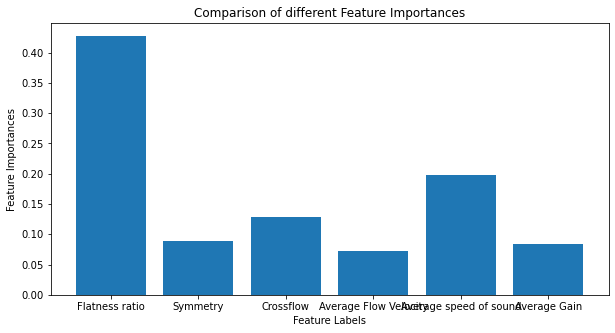

Flatness ratio
Average speed of sound
Crossflow
Symmetry
Average Gain
Average Flow Velocity


In [8]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator

dict_A = {}
dfA = pd.read_csv('4. Dataset Aggregation File/MeterA_aggregation.csv')
dfA.drop(dfA.filter(regex="Unname"),axis=1, inplace=True)
dfA_data = dfA.drop(['Class Attruibute'],axis=1)
dfA_target = dfA['Class Attruibute']
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dfA_data, dfA_target)
# display the relative importance of each attribute
print(list(model.feature_importances_))
fig = plt.figure(figsize = (10, 5))
# Plotting a Bar Graph to compare the models
plt.bar(list(dfA_data.columns.values), list(model.feature_importances_))
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show() 

for i in range(len(list(dfA_data.columns.values))):
    dict_A[str(list(dfA_data.columns.values)[i])]=list(model.feature_importances_)[i]
                                                                            
for k in sorted(dict_A, key=dict_A.get, reverse=True):
    print(k)

[0.022226116887136764, 0.0643560713716926, 0.07075136659368535, 0.09061430252756283, 0.03160719607195109, 0.17675214891250246, 0.07068499893330264, 0.0824252623201878, 0.07293438159566848, 0.06183095915961606, 0.1806448107864857, 0.0751723848402082]


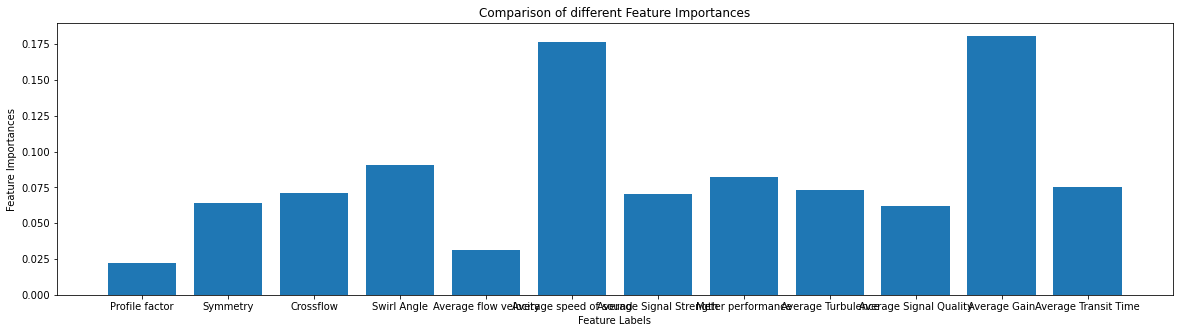

Average Gain
Average speed of sound
Swirl Angle
Meter performance
Average Transit Time
Average Turbulence
Crossflow
Average Signal Strength
Symmetry
Average Signal Quality
Average flow velocity
Profile factor


In [9]:
dict_B = {}
dfB = pd.read_csv('4. Dataset Aggregation File/MeterB_aggregation.csv')
dfB.drop(dfB.filter(regex="Unname"),axis=1, inplace=True)
dfB_data = dfB.drop(['Class Attruibute'],axis=1)
dfB_target = dfB['Class Attruibute']
model = ExtraTreesClassifier()
model.fit(dfB_data, dfB_target)
print(list(model.feature_importances_))
fig = plt.figure(figsize = (20, 5))
# Plotting a Bar Graph to compare the models
plt.bar(list(dfB_data.columns.values), list(model.feature_importances_))
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

for i in range(len(list(dfB_data.columns.values))):
    dict_B[str(list(dfB_data.columns.values)[i])]=list(model.feature_importances_)[i]
                                                                            
for k in sorted(dict_B, key=dict_B.get, reverse=True):
    print(k)

[0.08546579427182795, 0.16570726580741407, 0.07597472794969651, 0.056731585530066415, 0.10639624455942003, 0.22982563342792633, 0.08040625942382727, 0.09343812067170752, 0.10605436835811398]


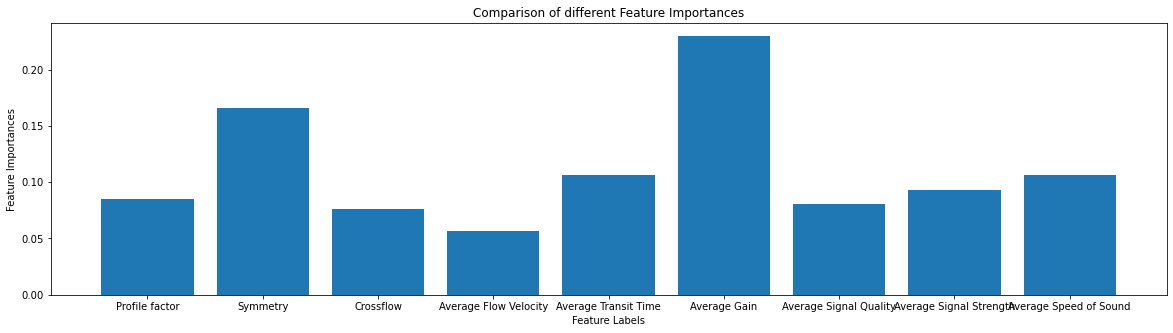

Average Gain
Symmetry
Average Transit Time
Average Speed of Sound
Average Signal Strength
Profile factor
Average Signal Quality
Crossflow
Average Flow Velocity


In [10]:
dict_C = {}
dfC = pd.read_csv('4. Dataset Aggregation File/MeterC_aggregation.csv')
dfC.drop(dfC.filter(regex="Unname"),axis=1, inplace=True)
dfC_data = dfC.drop(['Class Attruibute'],axis=1)
dfC_target = dfC['Class Attruibute']
model = ExtraTreesClassifier()
model.fit(dfC_data, dfC_target)
print(list(model.feature_importances_))
fig = plt.figure(figsize = (20, 5))
# Plotting a Bar Graph to compare the models
plt.bar(list(dfC_data.columns.values), list(model.feature_importances_))
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

for i in range(len(list(dfC_data.columns.values))):
    dict_C[str(list(dfC_data.columns.values)[i])]=list(model.feature_importances_)[i]
                                                                            
for k in sorted(dict_C, key=dict_C.get, reverse=True):
    print(k)